# Q7-Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
import numpy as np

path=r"C:\Unipi-CS\5ο εξάμηνο\Αναγνώριση Προτύπων\project\Data\original dataset\crimes.csv"

data=pd.read_csv(path)

In [25]:
data_train=data[data["split"]=="TRAIN"]
data_val=data[data["split"]=="VAL"]
data_test=data[data["split"]=="TEST"]

In [26]:
categorical_features = ["weapon_code", "scene_type", "weather", "vic_gender"]
continuous_features = ["hour_float", "latitude", "longitude", "victim_age", "temp_c", "humidity", "dist_precinct_km", "pop_density"]

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [28]:
X_train_transformed = preprocessor.fit_transform(data_train)

pca_full = PCA()
pca_full.fit(X_train_transformed)


eigenvalues = pca_full.explained_variance_

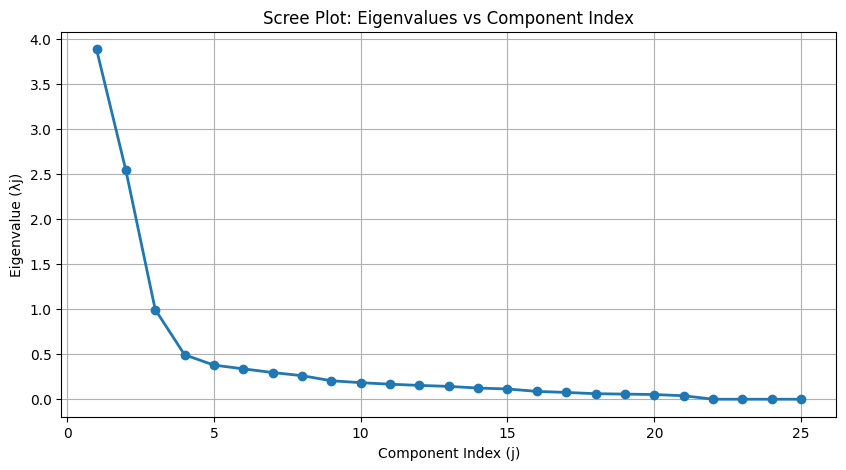

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', linewidth=2)
plt.title('Scree Plot: Eigenvalues vs Component Index')
plt.xlabel('Component Index (j)')
plt.ylabel('Eigenvalue (λj)')
plt.grid(True)
plt.show()

In [30]:
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
print(f"Cumulative Variance for first 5 components: {cum_var[:5]}")

Cumulative Variance for first 5 components: [0.36483817 0.60347108 0.69693859 0.74327322 0.77883947]


In [31]:
svm_results=np.load(r"C:\Unipi-CS\5ο εξάμηνο\Αναγνώριση Προτύπων\project\Data\Data Manger\svm_results.npy")

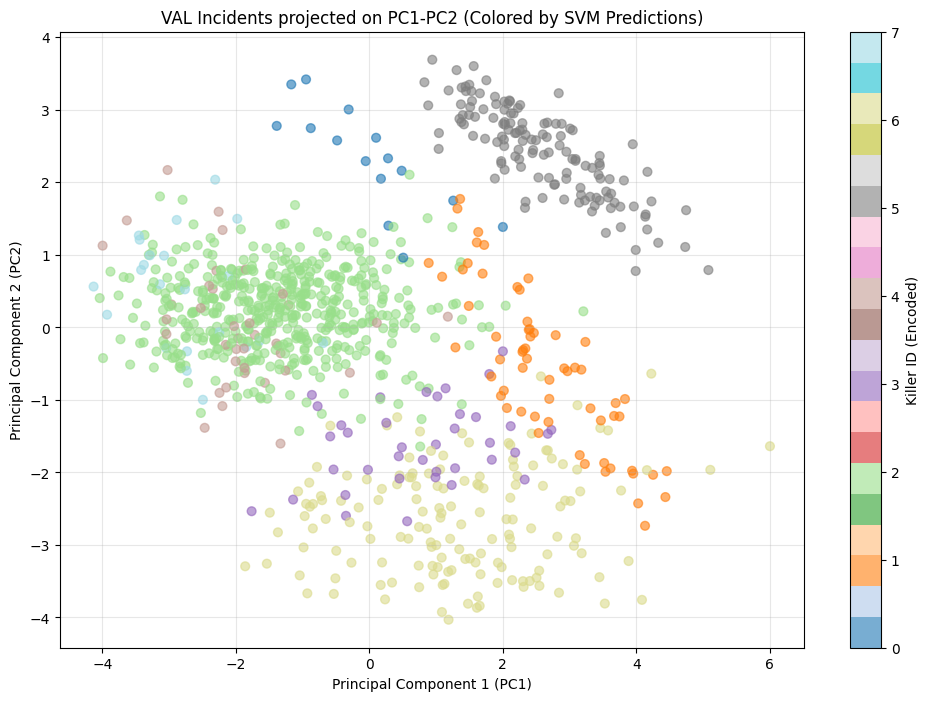

In [32]:
X_val_transformed = preprocessor.transform(data_val)


X_val_pca = pca_full.transform(X_val_transformed)[:, :2]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], 
                      c=pd.Categorical(svm_results).codes, 
                      cmap='tab20', alpha=0.6, s=40)

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('VAL Incidents projected on PC1-PC2 (Colored by SVM Predictions)')
plt.colorbar(scatter, label='Killer ID (Encoded)')
plt.grid(True, alpha=0.3)
plt.show()

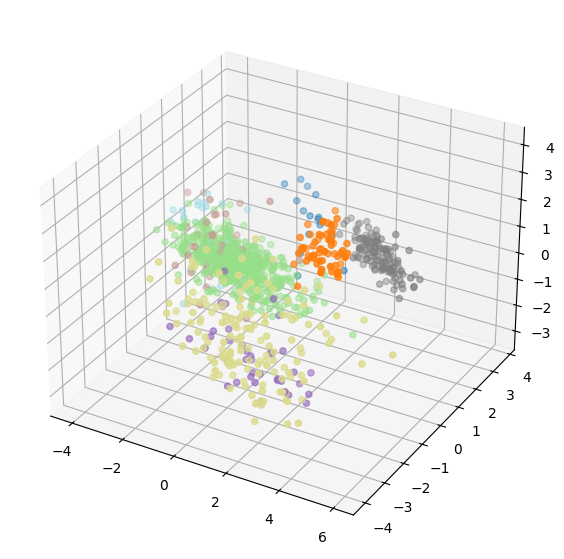

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
X_val_pca_3 = pca_full.transform(X_val_transformed)[:, :3] 

ax.scatter(X_val_pca_3[:, 0], X_val_pca_3[:, 1], X_val_pca_3[:, 2], 
           c=pd.Categorical(svm_results).codes, cmap='tab20')